In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
test_data = pd.read_csv('test_2umaH9m.csv')
display('Test',test_data.head())

'Test'

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
test_data.shape

(23490, 13)

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [5]:
test_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [6]:
def uniquevalues(data):
    for column in data.columns:
        print('total unique values in ', column, ':', str(data[column].nunique()))
        print('unique values in', column, ':', str(data[column].sort_values(ascending=True, na_position='last').unique()))
        print('\n')
uniquevalues(test_data)

total unique values in  employee_id : 23490
unique values in employee_id : [    3     6    11 ... 78284 78293 78295]


total unique values in  department : 9
unique values in department : ['Analytics' 'Finance' 'HR' 'Legal' 'Operations' 'Procurement' 'R&D'
 'Sales & Marketing' 'Technology']


total unique values in  region : 34
unique values in region : ['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']


total unique values in  education : 3
unique values in education : ["Bachelor's" 'Below Secondary' "Master's & above" nan]


total unique values in  gender : 2
unique values in gender : ['f' 'm']


total unique values in  recruitment_ch

In [7]:
train_data=pd.read_csv('train_LZdllcl.csv')
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
train_data.shape

(54808, 14)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [11]:
uniquevalues(train_data)

total unique values in  employee_id : 54808
unique values in employee_id : [    1     2     4 ... 78296 78297 78298]


total unique values in  department : 9
unique values in department : ['Analytics' 'Finance' 'HR' 'Legal' 'Operations' 'Procurement' 'R&D'
 'Sales & Marketing' 'Technology']


total unique values in  region : 34
unique values in region : ['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']


total unique values in  education : 3
unique values in education : ["Bachelor's" 'Below Secondary' "Master's & above" nan]


total unique values in  gender : 2
unique values in gender : ['f' 'm']


total unique values in  recruitment_ch

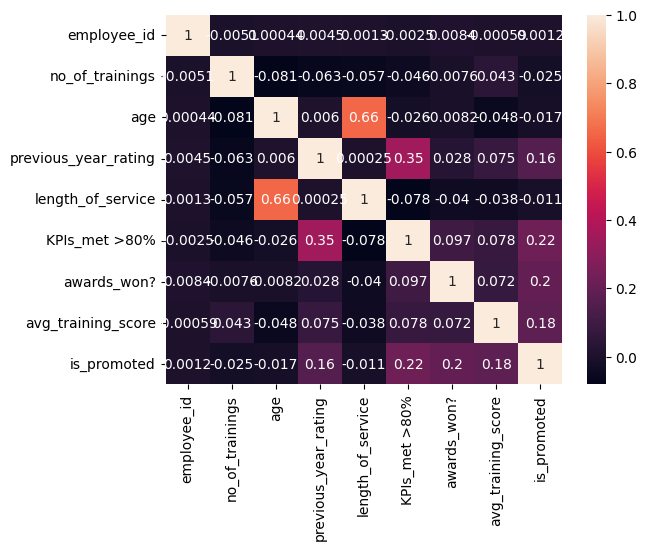

In [12]:
sns.heatmap(data=train_data.drop(['department', 'region',	'education',	'gender',	'recruitment_channel'], axis=1).corr(), annot=True);

* Age and length of service is highly correlated
* previous year rating and KPS>80 is highly correlated
* KPS>80 and is promoted is highly correlated

In [13]:
def duplicate_remove(data):
    print('Before removing', data.shape[0] )
    data.drop_duplicates(keep='first', inplace=True)
    print('After removing', data.shape[0])
duplicate_remove(train_data)

Before removing 54808
After removing 54808


* No duplicate data present

In [14]:
print('Train :')
display(train_data.isnull().sum())
print('\nTest :')
display(test_data.isnull().sum())

Train :


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


Test :


employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [15]:
train_data.loc[train_data['length_of_service'] == 1, 'previous_year_rating'] = train_data.loc[train_data['length_of_service'] == 1, 'previous_year_rating'].fillna(0)
display(train_data.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [16]:
data_fresh=train_data[train_data['length_of_service']==1]
data_fresh.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,0.0,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,0.0,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,0.0,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,0.0,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,0.0,1,1,0,47,0


In [17]:
test_data.loc[test_data['length_of_service'] == 1, 'previous_year_rating'] = test_data.loc[test_data['length_of_service'] == 1, 'previous_year_rating'].fillna(0)
display(test_data.isnull().sum())

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [18]:
del data_fresh

In [19]:
print('Train :')
display(train_data.isnull().sum())
print('\nTest :')
display(test_data.isnull().sum())

Train :


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


Test :


employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [20]:
train_data['education']=train_data['education'].ffill(axis = 0)
train_data['education']=train_data['education'].bfill(axis = 0)
test_data['education']=test_data['education'].ffill(axis = 0)
test_data['education']=test_data['education'].bfill(axis = 0)

print('Train :')
display(train_data.isnull().sum())
print('\nTest :')
display(test_data.isnull().sum())

Train :


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


Test :


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [21]:
labels = ['20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70']
train_data['age'] = pd.cut(train_data.age, range(20, 71, 10), right=False, labels=labels)
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,30 - 40,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30 - 40,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,30 - 40,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,30 - 40,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,40 - 50,3.0,2,0,0,73,0


<Axes: xlabel='count', ylabel='age'>

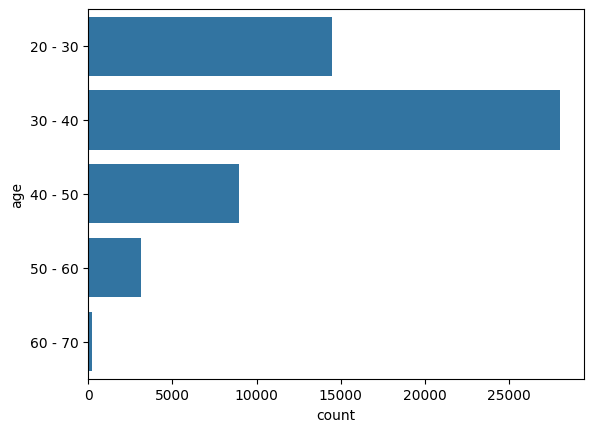

In [22]:
sns.countplot(train_data.age)

In [23]:
test_data['age'] = pd.cut(test_data.age, range(20, 71, 10), right=False, labels=labels)
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,20 - 30,0.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,30 - 40,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,30 - 40,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,30 - 40,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30 - 40,4.0,7,0,0,61


<Axes: xlabel='count', ylabel='age'>

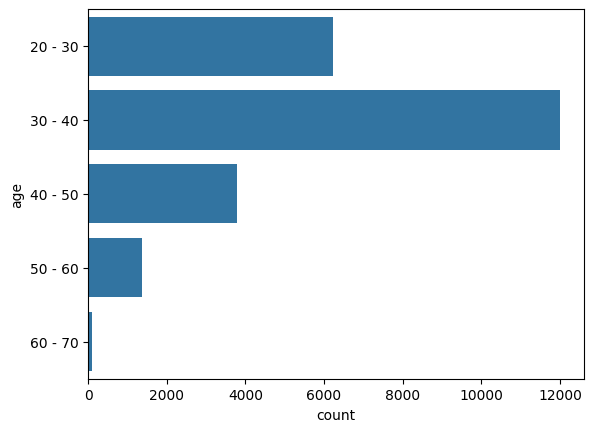

In [24]:
sns.countplot(test_data.age)

In [25]:
x_train=train_data[['department',	'region',	'education',	'gender',	'recruitment_channel',	'no_of_trainings',	'age',	'previous_year_rating',	'length_of_service',	'KPIs_met >80%',	'awards_won?',	'avg_training_score']]

y_train=train_data['is_promoted']
y_train=y_train.to_frame()

In [26]:
x_test=test_data[['department',	'region',	'education',	'gender',	'recruitment_channel',	'no_of_trainings',	'age',	'previous_year_rating',	'length_of_service',	'KPIs_met >80%',	'awards_won?',	'avg_training_score']]

In [27]:
def encode_data( encoding_type, encoding_data, encoding_columns):
    if encoding_type == 'LabelEncoding':
        print('LabelEncoding')
        encoder= LabelEncoding()
        for column in encoding_columns:
            print('column', column)
            encoding_data[column]= Encoder.fit_transform(tuple(encoding_data[column]))

    elif encoding_type == 'OneHotEncoding':
        print('OneHotEncoding')
        encoding_data= pd.get_dummies(encoding_data)

    dtypes_list= ['float64', 'float32', 'int64', 'int32']
    encoding_data.astype(dtypes_list[0]).dtypes

    return encoding_data

In [28]:
encoding_columns=['region', 'age', 'department', 'education', 'gender', 'recruitment_channel']
encoding_strategy=['LabelEncoding', 'OneHotEncoding']

x_train_encode= encode_data( encoding_strategy[1], x_train, encoding_columns)


OneHotEncoding


In [29]:
x_test_encode= encode_data( encoding_strategy[1], x_test, encoding_columns)

OneHotEncoding


In [30]:
display(x_train_encode.head())

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20 - 30,age_30 - 40,age_40 - 50,age_50 - 60,age_60 - 70
0,1,5.0,8,1,0,49,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
1,1,5.0,4,0,0,60,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
2,1,3.0,7,0,0,50,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
3,2,1.0,10,0,0,50,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
4,1,3.0,2,0,0,73,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False


In [31]:
display(x_test_encode.head())

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20 - 30,age_30 - 40,age_40 - 50,age_50 - 60,age_60 - 70
0,1,0.0,1,1,0,77,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
1,1,3.0,5,0,0,51,False,False,True,False,...,True,False,True,False,False,False,True,False,False,False
2,1,1.0,4,0,0,47,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
3,3,2.0,9,0,0,65,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
4,1,4.0,7,0,0,61,False,True,False,False,...,False,True,False,False,True,False,True,False,False,False


In [32]:
def scale_data(scaling_type, scaling_data, scaling_columns):
    if scaling_type == 'RobustScaler':
        scaling_data[scaling_columns]=RobustScaler().fit_transform(scaling_data[scaling_columns])

    elif scaling_type == 'StandardScaler':
        scaling_data[scaling_columns]=StandardScaler().fit_transform(scaling_data[scaling_columns])

    elif scaling_type == 'MinMaxScaler':
        scaling_data[scaling_columns]=MinMaxScaler().fit_transform(scaling_data[scaling_columns])

    elif scaling_type == 'MinAbsScaler':
        scaling_data[scaling_columns]=MinMaxScaler().fit_transform(scaling_data[scaling_columns])

    else:
        scaling_data[scaling_columns]=RobustScaler().fit_transform(scaling_data[scaling_columns])

    return scaling_data

In [33]:
scaling_type=['RobustScaler', 'StandardScaler', 'MinMaxScaler', 'MaxAbsScaler']
x_train_scale= scale_data(scaling_type[0], x_train_encode, x_train_encode.columns)
x_test_scale= scale_data(scaling_type[0], x_test_encode, x_test_encode.columns)

display(x_train_scale.head())
display(x_test_scale.head())

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20 - 30,age_30 - 40,age_40 - 50,age_50 - 60,age_60 - 70
0,0.0,1.0,0.75,1.0,0.0,-0.44,0.0,0.0,0.0,0.0,...,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,-0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.50,0.0,0.0,-0.40,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-1.0,1.25,0.0,0.0,-0.40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-0.75,0.0,0.0,0.52,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0


,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20 - 30,age_30 - 40,age_40 - 50,age_50 - 60,age_60 - 70
0,0.0,-1.5,-1.00,1.0,0.0,0.68,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.0,-0.36,0.0,0.0,1.0,0.0,...,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-1.0,-0.25,0.0,0.0,-0.52,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,-0.5,1.00,0.0,0.0,0.20,0.0,0.0,0.0,0.0,...,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5,0.50,0.0,0.0,0.04,0.0,1.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Create a Dictionary (Key->Value Pairs) for "ML Model Name" -> "ML Model Functions with Hyper-Parameters"
Classifiers = {
    '0.RandomForest': RandomForestClassifier(n_estimators=500, 
                                             max_depth=7, 
                                             class_weight='balanced'),
                            
    '1.GradientBoosting': GradientBoostingClassifier(learning_rate=0.05, 
                                                     n_estimators=500, 
                                                     max_depth=4, 
                                                     subsample=0.75),

    '2.AdaBoost': AdaBoostClassifier(n_estimators=500, 
                                     learning_rate=0.05),

    '3.LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
}

print(list(Classifiers.keys()))
print(list(Classifiers.values()))

['0.RandomForest', '1.GradientBoosting', '2.AdaBoost', '3.LogisticRegression']
[RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=500), GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=500,
                           subsample=0.75), AdaBoostClassifier(learning_rate=0.05, n_estimators=500), LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')]


In [ ]:
voting_model = VotingClassifier(estimators=[
                                              ('RandomForest_Best', list(Classifiers.values())[0]), 
                                              ('GradientBoosting_Best', list(Classifiers.values())[1]),
                                              ('AdaBoost_Best', list(Classifiers.values())[2]),
                                              ('LogisticRegression_Best', list(Classifiers.values())[3])
                                             ], 
                                             voting='soft', weights=[5, 5, 5,5.5])

param_grid={
    'RandomForest_Best__n_estimators': [400,500],
    'RandomForest_Best__max_depth': [6],
    'GradientBoosting_Best__learning_rate': [0.05,0.1],
    'GradientBoosting_Best__n_estimators': [400,500],
    'GradientBoosting_Best__max_depth': [3,4],
    'AdaBoost_Best__n_estimators': [500,600],
    'AdaBoost_Best__learning_rate': [0.05,0.1]
}

grid_search= GridSearchCV(estimator=voting_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(x_train_scale, y_train) 

best_voting_model=grid_search.best_estimator_
# Predict probabilities
predictions_of_voting = best_voting_model.predict_proba(x_test_scale)[:, 1]

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [ ]:
# Round off the probability results
predictions = [int(round(value)) for value in predictions_of_voting]

# Create a DataFrame for submission
Result_Promoted = pd.DataFrame({'employee_id': test_data["employee_id"], 'is_promoted' : predictions})

# Name the submission file and save it
file_name = "HR results"
Result_Promoted.to_csv(file_name + ".csv", index=False)